# Problem Definition

## Code to detect spam e-mails 

## Problem Definition

- The SMS spam collection is a set of SMS messages that have been tagged for SMS spam research. It contains one set of SMS messages that contain 5,574 messgaes, tagged according being ham (legitmate) or spam.

- The files contain 1 message per line & each line is composed of 2 columns: v1 contain the label (ham or spam) & v2 contains the raw text.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
spam_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
spam_df.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [10]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
spam_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Visualize dataset

In [22]:
ham = spam_df[  spam_df['spam'] == 0]

In [23]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [24]:
spam = spam_df[spam_df['spam'] == 1]

In [25]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [26]:
# Plot the % of spam e-mails
print('Spam Percentage = ', (len(spam)/len(spam_df) )*100, '%' )

Spam Percentage =  23.88268156424581 %


In [27]:
print('Ham Percentage =', (len(ham)/len(spam_df)  )*100, '%')

Ham Percentage = 76.11731843575419 %


/Users/re-routeentertainment/Desktop/spam-classifier/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/re-routeentertainment/Desktop/spam-classifier/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/re-routeentertainment/Desktop/spam-classifier/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


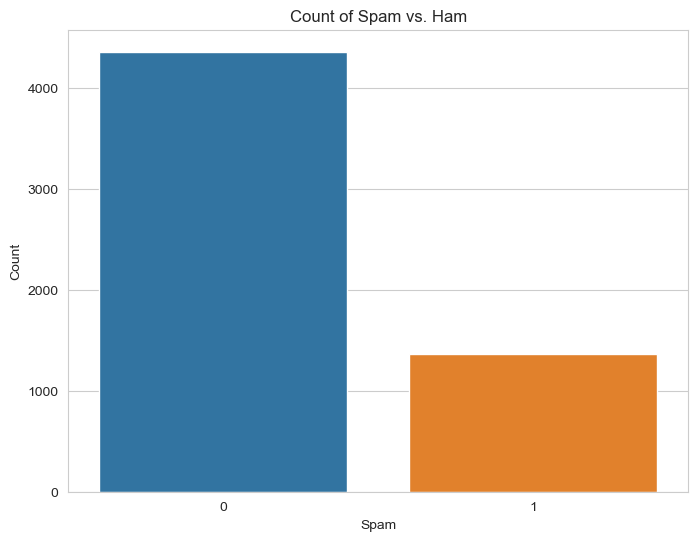

In [36]:
# Plot seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Create the countplot
sns.countplot(x='spam', data=spam_df, label='Count Spam vs. Ham')

# Customize x-axis labels and y-axis ticks
plt.xticks([0, 1], ['0', '1'])
plt.yticks(range(0, 4001, 1000))

# Set axis labels and plot title
plt.xlabel('Spam')
plt.ylabel('Count')
plt.title('Count of Spam vs. Ham')

# Show the plot
plt.show()


## Create testing & training dataset // Feature Engineering

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This document is the second document.', 'And this is the third one.', 'Is this the first document?']

sample_vectorizer = CountVectorizer()

In [40]:
X = sample_vectorizer.fit_transform(sample_data)

In [41]:
print(X.toarray())

[[0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [44]:
print(sample_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


## Apply CountVectorizer to spam/ham dataset

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

#Transformed text into numbers
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [49]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [50]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
spamham_countvectorizer.shape

(5728, 37303)

## Training the Model

In [53]:
label = spam_df['spam'].values

In [54]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [58]:
testing_sample = ['Free money!!!', 'Hi Kim, Please let me know if you need any further information. Thanks ']
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [60]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0])

In [61]:
testing_sample = ["Hello, I am Ryan, I'd like to book a hotel in Bali by January 24th.", "money viagra!!!!!"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([0, 1])

## Divide the data into training & testing prior to testing

In [83]:
# Label X & y
X = spamham_countvectorizer
y = label

In [84]:
X.shape

(5728, 37303)

In [85]:
y.shape

(5728,)

In [86]:
# Import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [87]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

## Evaluating the Model

In [88]:
# Import Classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
# Create y_preds
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 1])

<Axes: >

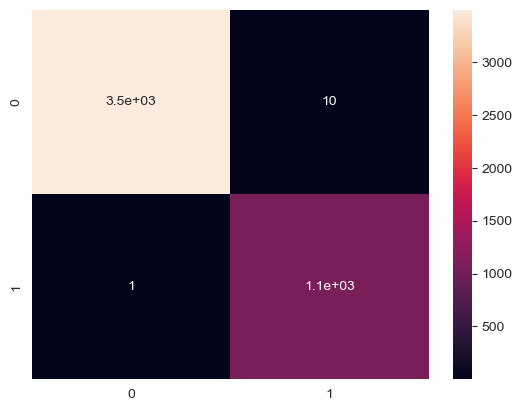

In [93]:
# Create confusion matrix use seaborn for visualizations for training data
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)
# we've correctly classified 3300 samples of data & misclassified about 10 (for training data)

<Axes: >

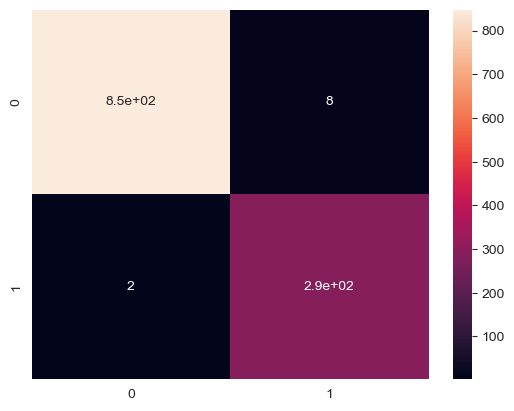

In [95]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True) #only mis classified 10 samples out of all of it

In [96]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       856
           1       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

